# Day 3 -- analysis

0. Your questions 
1. Sorting our data
2. Grouping
3. Multi-indexes and grouping
4. Pivot tables
5. Cleaning our data
6. Plotting and visualization
7. What's next?

# Sorting our data

One of the most important topics in computer science in sorting. 

Do we really need to sort our data in Pandas?  Maybe.

But if we want the 5 largest values. If we want the 10 smallest values.

There are multiple ways to sort:

- Sort by the index
- Sort by a column (if it's a data frame)
- Sort by multiple columns (if it's a data frame)

In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import numpy as np

In [3]:
np.random.seed(0)   # this resets the random number generator to be deterministic
s = Series(np.random.randint(-50, 50, 10))
s

0    -6
1    -3
2    14
3    17
4    17
5   -41
6    33
7   -29
8   -14
9    37
dtype: int64

In [4]:
# These are sorted by index -- because we created teh series with the index
# I want to sort these by value!

s.sort_values()  # this returns a new series, based on s, with the same index/values, but sorted by value

5   -41
7   -29
8   -14
0    -6
1    -3
2    14
3    17
4    17
6    33
9    37
dtype: int64

In [5]:
s

0    -6
1    -3
2    14
3    17
4    17
5   -41
6    33
7   -29
8   -14
9    37
dtype: int64

In [6]:
# in theory, you could invoke sort_values with the inplace=True keyword argument
# but don't do that!

s = s.sort_values()  # this is the right way to do it!
s

5   -41
7   -29
8   -14
0    -6
1    -3
2    14
3    17
4    17
6    33
9    37
dtype: int64

In [7]:
# what if I want to sort from biggest to smallest?

s.sort_values(ascending=False)  

9    37
6    33
3    17
4    17
2    14
1    -3
0    -6
8   -14
7   -29
5   -41
dtype: int64

In [8]:
np.random.seed(0)   # this resets the random number generator to be deterministic
s = Series(np.random.randint(-50, 50, 10),
          index=list('fdegabhijc'))
s


f    -6
d    -3
e    14
g    17
a    17
b   -41
h    33
i   -29
j   -14
c    37
dtype: int64

In [9]:
s.sort_values()

b   -41
i   -29
j   -14
f    -6
d    -3
e    14
g    17
a    17
h    33
c    37
dtype: int64

In [10]:
s.sort_index()

a    17
b   -41
c    37
d    -3
e    14
f    -6
g    17
h    33
i   -29
j   -14
dtype: int64

In [11]:
# let's set an index that repeats

np.random.seed(0)   # this resets the random number generator to be deterministic
s = Series(np.random.randint(-50, 50, 10),
          index=list('abcdefabcd'))
s


a    -6
b    -3
c    14
d    17
e    17
f   -41
a    33
b   -29
c   -14
d    37
dtype: int64

In [12]:
s.loc['a']

a    -6
a    33
dtype: int64

In [13]:
s.loc['f']

np.int64(-41)

In [14]:
s.loc['b':'e']

KeyError: "Cannot get left slice bound for non-unique label: 'b'"

In [15]:
# if you sort your index, then this error goes away!

s.sort_index().loc['b':'e']

b    -3
b   -29
c    14
c   -14
d    17
d    37
e    17
dtype: int64

In [16]:
help(s.sort_values)

Help on method sort_values in module pandas.core.series:

sort_values(
    *,
    axis: 'Axis' = 0,
    ascending: 'bool | Sequence[bool]' = True,
    inplace: 'bool' = False,
    kind: 'SortKind' = 'quicksort',
    na_position: 'NaPosition' = 'last',
    ignore_index: 'bool' = False,
    key: 'ValueKeyFunc | None' = None
) -> 'Series | None' method of pandas.core.series.Series instance
    Sort by the values.

    Sort a Series in ascending or descending order by some
    criterion.

    Parameters
    ----------
    axis : {0 or 'index'}
        Unused. Parameter needed for compatibility with DataFrame.
    ascending : bool or list of bools, default True
        If True, sort values in ascending order, otherwise descending.
    inplace : bool, default False
        If True, perform operation in-place.
    kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, default 'quicksort'
        Choice of sorting algorithm. See also :func:`numpy.sort` for more
        information. 'mergesor

In [17]:
s


a    -6
b    -3
c    14
d    17
e    17
f   -41
a    33
b   -29
c   -14
d    37
dtype: int64

In [19]:
s = Series([-10, 10, 20, -20])
s.sort_values(key=abs)   # this means: sort them by absolute value!

0   -10
1    10
2    20
3   -20
dtype: int64

In [20]:
# what if I want the 3 smallest numbers in s?

np.random.seed(0)   # this resets the random number generator to be deterministic
s = Series(np.random.randint(-50, 50, 10),
          index=list('abcdefabcd'))

s.sort_values().head(3)

f   -41
b   -29
c   -14
dtype: int64

In [21]:
# what about the 3 largest ones?

s.sort_values().tail(3)

e    17
a    33
d    37
dtype: int64

In [22]:
s.sort_values(ascending=False).head(3)

d    37
a    33
d    17
dtype: int64

# What about data frames?

Everything I said is true about data frames, also:

- We have `sort_index`
- We have `sort_values`, but we have to specify the column on which we want to sort

In [23]:
np.random.seed(0)
df = DataFrame(np.random.randint(-50, 50, [4, 5]),
              index=list('abcd'),
              columns=list('vwxyz'))
df

,v,w,x,y,z
a,-6,-3,14,17,17
b,-41,33,-29,-14,37
c,20,38,38,-38,8
d,15,-11,37,-4,38


In [24]:
df.sort_values('v')   # sort in increasing order by column v

,v,w,x,y,z
b,-41,33,-29,-14,37
a,-6,-3,14,17,17
d,15,-11,37,-4,38
c,20,38,38,-38,8


In [25]:
df.sort_values('v', ascending=False)   # sort in increasing order by column v

,v,w,x,y,z
c,20,38,38,-38,8
d,15,-11,37,-4,38
a,-6,-3,14,17,17
b,-41,33,-29,-14,37


In [26]:
df.loc['d', 'w'] = -3
df

,v,w,x,y,z
a,-6,-3,14,17,17
b,-41,33,-29,-14,37
c,20,38,38,-38,8
d,15,-3,37,-4,38


In [27]:
df.sort_values('w')

,v,w,x,y,z
a,-6,-3,14,17,17
d,15,-3,37,-4,38
b,-41,33,-29,-14,37
c,20,38,38,-38,8


In [28]:
df.sort_values(['w', 'y'])  # it'll sort by w, but if there's a tie, it will use y

,v,w,x,y,z
d,15,-3,37,-4,38
a,-6,-3,14,17,17
b,-41,33,-29,-14,37
c,20,38,38,-38,8


In [29]:
df.sort_values(['w', 'y'], ascending=False)

,v,w,x,y,z
c,20,38,38,-38,8
b,-41,33,-29,-14,37
a,-6,-3,14,17,17
d,15,-3,37,-4,38


In [30]:
# what if I want w in increasing order, and y in decreasing order?

df.sort_values(['w', 'y'], ascending=[True, False])   # this means: w is ascending, y is descending

,v,w,x,y,z
a,-6,-3,14,17,17
d,15,-3,37,-4,38
b,-41,33,-29,-14,37
c,20,38,38,-38,8


# Exercise: Temperatures

1. Create a data frame with two columns, `highs` and `lows`, for the 10-day forecast starting today. The index should contain strings of the form `MMDD`, with a two-digit month and two-digit day.
2. Find the three days with the highest temperatures.
3. Find the three days with the biggest differences between (forecast) high and low temps.
4. Would you, for any of this, need to sort by the index?

In [32]:
df = DataFrame({'highs':[25, 27, 29, 29, 32, 33, 36, 29, 27, 27],
               'lows':[14, 15, 16, 17, 19, 21, 20, 17, 16, 16]},
              index='0519 0520 0521 0522 0523 0524 0525 0526 0527 0528'.split())
df

,highs,lows
0519,25,14
0520,27,15
0521,29,16
0522,29,17
0523,32,19
0524,33,21
0525,36,20
0526,29,17
0527,27,16
0528,27,16


In [34]:
df.sort_values('highs').tail(3)

,highs,lows
0523,32,19
0524,33,21
0525,36,20


In [35]:
df['diffs'] = df['highs'] - df['lows']
df

,highs,lows,diffs
0519,25,14,11
0520,27,15,12
0521,29,16,13
0522,29,17,12
0523,32,19,13
0524,33,21,12
0525,36,20,16
0526,29,17,12
0527,27,16,11
0528,27,16,11


In [37]:
df.sort_values('diffs').tail(3)

,highs,lows,diffs
0521,29,16,13
0523,32,19,13
0525,36,20,16


In [38]:
df = df.sort_values('diffs')

In [39]:
df

,highs,lows,diffs
0519,25,14,11
0527,27,16,11
0528,27,16,11
0520,27,15,12
0522,29,17,12
0524,33,21,12
0526,29,17,12
0521,29,16,13
0523,32,19,13
0525,36,20,16


In [40]:
df.sort_index()

,highs,lows,diffs
0519,25,14,11
0520,27,15,12
0521,29,16,13
0522,29,17,12
0523,32,19,13
0524,33,21,12
0525,36,20,16
0526,29,17,12
0527,27,16,11
0528,27,16,11


In [41]:
# there are two great methods that do this for us!
# nlargest and nsmalleset

df.nlargest(columns='diffs', n=3)

,highs,lows,diffs
0525,36,20,16
0521,29,16,13
0523,32,19,13


In [42]:
df.nsmallest(columns='diffs', n=3)

,highs,lows,diffs
0519,25,14,11
0527,27,16,11
0528,27,16,11


# Grouping!

Let's redo our temperature data to use days of the week


In [43]:
df = DataFrame({'highs':[25, 27, 29, 29, 32, 33, 36, 29, 27, 27],
               'lows':[14, 15, 16, 17, 19, 21, 20, 17, 16, 16]},
              index='Mon Tue Wed Thu Fri Sat Sun Mon Tue Wed'.split())
df

,highs,lows
Mon,25,14
Tue,27,15
Wed,29,16
Thu,29,17
Fri,32,19
Sat,33,21
Sun,36,20
Mon,29,17
Tue,27,16
Wed,27,16


In [46]:
# I want to find out the mean high temp on Mondays

df.loc['Mon', 'highs'].mean()  # rows have 'Mon', column is 'highs'

np.float64(27.0)

In [47]:
# I want to find out the mean high temp on Tuesdays

df.loc['Tue', 'highs'].mean()  

np.float64(27.0)

In [48]:
# I want to find out the mean high temp on Tuesdays

df.loc['Wed', 'highs'].mean()  

np.float64(28.0)

In [49]:
# this is annoying. What I really want is:

# for every different value of day, give me the mean temperature

# first, I'll use reset_index to move the index into a regular column

In [50]:
df = df.reset_index()
df

,index,highs,lows
0,Mon,25,14
1,Tue,27,15
2,Wed,29,16
3,Thu,29,17
4,Fri,32,19
5,Sat,33,21
6,Sun,36,20
7,Mon,29,17
8,Tue,27,16
9,Wed,27,16


In [53]:
# now I can ask Pandas to group!

# - we need one categorical column -- we'll get one result row back for each distinct value here
# - we need one numeric column
# - we need an aggregation method (e.g., mean, min, max, median)

df.groupby('index', sort=False)['highs'].mean()

index
Mon    27.0
Tue    27.0
Wed    28.0
Thu    29.0
Fri    32.0
Sat    33.0
Sun    36.0
Name: highs, dtype: float64

# Exercise: Grouping questions with taxis

1. Load `taxi.csv` into a data frame.
2. For each number of passengers, what was the mean `total_amount`?
3. What would happen if you were to run `groupby` on the taxi data for `trip_distance`, getting the mean `total_amount` for each `trip_distance` value?

In [54]:
df = pd.read_csv('taxi.csv')

In [55]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


In [56]:
# - categorical -- passenger_count -- in (), in groupby call
# - numeric -- total_amount -- in [], after groupby call
# - aggregation function -- mean -- invoked on the []

df.groupby('passenger_count')['total_amount'].mean()

passenger_count
0    25.570000
1    17.368569
2    18.406306
3    17.994704
4    18.881648
5    17.211269
6    17.401355
Name: total_amount, dtype: float64

In [57]:
# - categorical -- we can set this to be trip_distance
# - numeric -- total_amount -- in [], after groupby call
# - aggregation function -- mean -- invoked on the []

df.groupby('trip_distance')['total_amount'].mean()

trip_distance
0.00      31.58194
0.01      52.80000
0.02      43.46000
0.03       3.96000
0.04      70.01000
           ...    
34.84    137.59000
35.51    135.13000
37.20    210.14000
60.30    160.05000
64.60     79.96000
Name: total_amount, Length: 1219, dtype: float64

# Next up

- More advanced grouping
- Pivot tables

# More sophisticated grouping

In the last exercise, we grouped by `passenger_count` -- how far did people go, on average, for each distinct number of passengers?

What if we want to know, for each number of passengers, not only how far they went, but also how much they paid? 

In other words, we want to find out the mean `trip_distance` and `total_amount` for each value of `passenger_count`.



In [58]:
# categorical -- passenger_count
# numeric -- total_amount and trip_distance -- so we put those names in [], inside of a list
# aggregation method -- mean

df.groupby('passenger_count')[['trip_distance', 'total_amount']].mean()

,trip_distance,total_amount
passenger_count,,
0,4.600000,25.570000
1,3.092338,17.368569
2,3.384387,18.406306
3,3.342389,17.994704
4,3.628901,18.881648
5,3.182712,17.211269
6,3.170976,17.401355


In [59]:
# normally, we get a series back from a groupby
# that's because we want a single numeric column to be grouped + calculated
# what if you want to get a data frame back, with a single column?
# just use double [], with one column named!

df.groupby('passenger_count')[['trip_distance']].mean()

,trip_distance
passenger_count,
0,4.600000
1,3.092338
2,3.384387
3,3.342389
4,3.628901
5,3.182712
6,3.170976


In [61]:
# another way to make our groupby more sophisticated -- more than one categorical column
# what if I want to group on both passenger_count and payment_type

# I can pass a list of categorical columns as the argument to "groupby"

df.groupby(['passenger_count', 'payment_type'])['trip_distance'].mean()

passenger_count  payment_type
0                1                4.600000
1                1                3.408621
                 2                2.613389
                 3                1.900968
                 4                1.718000
2                1                3.625507
                 2                3.016911
                 3               11.700000
3                1                3.221504
                 2                3.493575
                 4                3.600000
4                1                4.161136
                 2                3.130638
5                1                3.518750
                 2                2.645050
6                1                3.178606
                 2                3.161118
Name: trip_distance, dtype: float64

In [62]:
# another possibility: We can have multiple aggregation methods
# very often, we'll want mean + std, or mean + median
# the way that we do this is a little weird -- we invoke "agg", and pass it
# a list of strings that should be invoked.

df.groupby('passenger_count')['trip_distance'].agg(['mean', 'median'])

,mean,median
passenger_count,,
0,4.600000,4.600
1,3.092338,1.630
2,3.384387,1.800
3,3.342389,1.700
4,3.628901,2.000
5,3.182712,1.675
6,3.170976,1.670


In [64]:
# we can combine these together! 

analysis = df.groupby('passenger_count')[['trip_distance', 'total_amount']].agg(['mean', 'median'])
analysis

trip_distance        total_amount       
                         mean median         mean median
passenger_count                                         
0                    4.600000  4.600    25.570000  25.57
1                    3.092338  1.630    17.368569  12.36
2                    3.384387  1.800    18.406306  12.80
3                    3.342389  1.700    17.994704  13.13
4                    3.628901  2.000    18.881648  13.68
5                    3.182712  1.675    17.211269  12.30
6                    3.170976  1.670    17.401355  12.80

In [65]:
analysis['trip_distance']

,mean,median
passenger_count,,
0,4.600000,4.600
1,3.092338,1.630
2,3.384387,1.800
3,3.342389,1.700
4,3.628901,2.000
5,3.182712,1.675
6,3.170976,1.670


In [67]:
# put a tuple inside of [] to dig down through a hierarchy
analysis[('trip_distance', 'mean')]

passenger_count
0    4.600000
1    3.092338
2    3.384387
3    3.342389
4    3.628901
5    3.182712
6    3.170976
Name: (trip_distance, mean), dtype: float64

In [70]:
# what if I provide two columns for grouping? How do I deal with multi-indexed rows?

results = df.groupby(['passenger_count', 'payment_type'])['trip_distance'].mean()
results

passenger_count  payment_type
0                1                4.600000
1                1                3.408621
                 2                2.613389
                 3                1.900968
                 4                1.718000
2                1                3.625507
                 2                3.016911
                 3               11.700000
3                1                3.221504
                 2                3.493575
                 4                3.600000
4                1                4.161136
                 2                3.130638
5                1                3.518750
                 2                2.645050
6                1                3.178606
                 2                3.161118
Name: trip_distance, dtype: float64

In [71]:
results.loc[(2, 1)]

np.float64(3.625506666666667)

In [72]:
results.loc[[2, 1]]

passenger_count  payment_type
2                1                3.625507
                 2                3.016911
                 3               11.700000
1                1                3.408621
                 2                2.613389
                 3                1.900968
                 4                1.718000
Name: trip_distance, dtype: float64

In [74]:
df.groupby(['passenger_count', 'payment_type'])[['trip_distance', 'total_amount']].agg(['mean', 'median'])


trip_distance        total_amount        
                                      mean median         mean  median
passenger_count payment_type                                          
0               1                 4.600000  4.600    25.570000  25.570
1               1                 3.408621  1.800    19.883125  14.160
                2                 2.613389  1.400    13.512674  10.300
                3                 1.900968  0.900    12.020645   5.800
                4                 1.718000  0.900     7.780000   7.800
2               1                 3.625507  1.900    20.934013  14.750
                2                 3.016911  1.700    14.892018  10.800
                3                11.700000  9.900    42.480000  31.300
3               1                 3.221504  1.780    18.779292  14.135
                2                 3.493575  1.640    16.988436  11.800
                4                 3.600000  3.600    20.800000  20.800
4               1                 4.161136  2.255    22.454773  15.980
                2                 3.130638  1.685    15.536596  11.300
5               1                 3.518750  1.905    19.634750  14.160
                2                 2.645050  1.410    13.333700  10.550
6               1                 3.178606  1.755    18.980288  14.120
                2                 3.161118  1.520    15.361491  11.300

# Exercise: Olympic data

(use the file `olympic_athlete_events.csv`)

1. In the file you can download is data about every Olympic game. Load it into a data frame.
2. Find, for every Team (for every country), the mean height and weight of their athletes.
3. Find, for every team, the mean + median height and weight.
4. Find, for every year + season, the mean + median height and weight.

In [75]:
filename = '/Users/reuven/Courses/Current/Data/olympic_athlete_events.csv'



In [76]:
!head $filename

"ID","Name","Sex","Age","Height","Weight","Team","NOC","Games","Year","Season","City","Sport","Event","Medal"
"1","A Dijiang","M",24,180,80,"China","CHN","1992 Summer",1992,"Summer","Barcelona","Basketball","Basketball Men's Basketball",NA
"2","A Lamusi","M",23,170,60,"China","CHN","2012 Summer",2012,"Summer","London","Judo","Judo Men's Extra-Lightweight",NA
"3","Gunnar Nielsen Aaby","M",24,NA,NA,"Denmark","DEN","1920 Summer",1920,"Summer","Antwerpen","Football","Football Men's Football",NA
"4","Edgar Lindenau Aabye","M",34,NA,NA,"Denmark/Sweden","DEN","1900 Summer",1900,"Summer","Paris","Tug-Of-War","Tug-Of-War Men's Tug-Of-War","Gold"
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 500 metres",NA
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 1,000 metres",NA
"5","Christine Jacoba Aaftink","F",25,1

In [77]:
df = pd.read_csv(filename)

In [78]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [79]:
df['Team']

0                  China
1                  China
2                Denmark
3         Denmark/Sweden
4            Netherlands
               ...      
271111          Poland-1
271112            Poland
271113            Poland
271114            Poland
271115            Poland
Name: Team, Length: 271116, dtype: object

In [82]:
# Find, for every Team (for every country), the mean height and weight of their athletes.

# categorical -- Team
# numeric -- Height + Weight
# aggregation method -- mean

(
    df
    .groupby('Team')[['Height', 'Weight']].mean()
    .loc[['United States', 'Canada', 'Great Britain', 'France', 'Italy', 'Japan', 'Germany']]
)

,Height,Weight
Team,,
United States,176.835467,72.407174
Canada,174.931885,70.257556
Great Britain,175.638320,70.444283
France,175.216527,69.484337
Italy,175.220278,70.656526
Japan,168.173326,63.215977
Germany,177.213198,71.983220


In [83]:
(
    df
    .groupby('Team')[['Height', 'Weight']].mean()
    .loc[['United States', 'Canada', 'Great Britain', 'France', 'Italy', 'Japan', 'Germany']]
    .sort_values('Height')
)

,Height,Weight
Team,,
Japan,168.173326,63.215977
Canada,174.931885,70.257556
France,175.216527,69.484337
Italy,175.220278,70.656526
Great Britain,175.638320,70.444283
United States,176.835467,72.407174
Germany,177.213198,71.983220


In [86]:
# Find, for every team, the mean + median height and weight.

(
    df
    .groupby('Team')[['Height', 'Weight']].agg(['mean', 'median'])
    .loc[['United States', 'Canada', 'Great Britain', 'France', 'Italy', 'Japan', 'Germany']]
)


Height            Weight       
                     mean median       mean median
Team                                              
United States  176.835467  178.0  72.407174   71.0
Canada         174.931885  175.0  70.257556   70.0
Great Britain  175.638320  175.0  70.444283   70.0
France         175.216527  175.0  69.484337   69.0
Italy          175.220278  175.0  70.656526   70.0
Japan          168.173326  168.0  63.215977   62.0
Germany        177.213198  178.0  71.983220   70.0

In [87]:
# Find, for every year + season, the mean + median height and weight.

(
    df
    .groupby(['Year', 'Season'])[['Height', 'Weight']].agg(['mean', 'median'])
)

Height            Weight       
                   mean median       mean median
Year Season                                     
1896 Summer  172.739130  174.0  71.387755  70.00
1900 Summer  176.637931  178.0  74.556962  74.00
1904 Summer  175.788732  176.0  72.197279  71.00
1906 Summer  178.206226  178.0  75.917073  77.00
1908 Summer  177.543158  178.0  75.386128  75.00
1912 Summer  177.447989  178.0  73.117450  71.00
1920 Summer  175.752282  175.0  73.106157  71.00
1924 Summer  175.239548  175.0  71.812018  70.00
     Winter  172.213483  172.0  69.560976  70.00
1928 Summer  175.331770  175.0  70.941791  69.00
     Winter  173.975410  173.0  71.625000  71.50
1932 Summer  174.371681  173.0  70.897980  70.00
     Winter  173.433673  173.0  67.363636  67.00
1936 Summer  176.112689  176.0  71.630363  71.00
     Winter  172.705882  173.0  70.051282  71.00
1948 Summer  176.600190  176.0  71.942308  71.00
     Winter  172.293103  172.0  68.540541  70.00
1952 Summer  174.183023  174.0  70.096173  68.00
     Winter  173.540000  173.0  69.191275  68.00
1956 Summer  174.116567  175.0  70.364200  69.25
     Winter  172.433140  172.0  70.554094  70.00
1960 Summer  173.310287  173.0  69.393811  68.00
     Winter  170.701493  170.0  68.136719  68.00
1964 Summer  173.690848  174.0  69.686692  68.00
     Winter  172.133674  172.0  69.840134  70.00
1968 Summer  174.087484  174.0  69.454786  68.00
     Winter  173.289689  174.0  70.261145  70.00
1972 Summer  174.745758  175.0  70.086422  70.00
     Winter  173.463415  174.0  69.495128  70.00
1976 Summer  175.053724  175.0  70.066143  69.75
     Winter  174.099032  175.0  70.531490  70.00
1980 Summer  175.634392  176.0  70.668078  70.00
     Winter  174.991354  175.0  70.968705  72.00
1984 Summer  175.573516  175.0  70.058133  70.00
     Winter  175.390194  176.0  71.099028  71.00
1988 Summer  175.683249  176.0  70.224268  70.00
     Winter  176.104249  177.0  72.002725  72.00
1992 Summer  176.382283  176.0  71.143607  70.00
     Winter  175.395332  176.0  71.116780  70.00
1994 Winter  175.169862  176.0  71.062100  70.00
1996 Summer  175.895121  176.0  70.903281  70.00
1998 Winter  174.581369  175.0  70.943734  70.00
2000 Summer  176.089721  176.0  71.119046  70.00
2002 Winter  174.702451  175.0  71.197070  69.00
2004 Summer  175.972850  176.0  71.280695  70.00
2006 Winter  174.623172  175.0  70.519354  69.00
2008 Summer  176.211062  176.0  71.397679  70.00
2010 Winter  174.918182  175.0  70.740863  70.00
2012 Summer  176.262469  176.0  71.319586  69.00
2014 Winter  174.816670  175.0  70.760111  70.00
2016 Summer  176.034266  175.0  70.988637  69.00

# Pivot tables

A pivot table lets us summarize a subset of our data in a data frame:

- The index of the pivot table (i.e., the row labels) are from one categorical column, and contain the unique values from that column.
- The column names of the pivot table (i.e., the column labels) are from a different categorical column, and contain the unique values from that column.
- The values are taken from the intersection of the index and columns in the original data.
- You can choose an aggregation method, as well.

In [88]:
# let's create a pivot table:

# index: `Year`
# columns: `Season`
# values: `Height`
# aggfunc: `mean`


df.pivot_table(index='Year',
              columns='Season',
              values='Height',
              aggfunc='mean')

Season,Summer,Winter
Year,,
1896,172.739130,NaN
1900,176.637931,NaN
1904,175.788732,NaN
1906,178.206226,NaN
1908,177.543158,NaN
1912,177.447989,NaN
1920,175.752282,NaN
1924,175.239548,172.213483
1928,175.331770,173.975410


# Exercise: Taxi pivots

Create a pivot table based on `taxi.csv` whose rows are the payment types and whose columns are `passenger_count`.

In [89]:
df = pd.read_csv('taxi.csv')

In [90]:
# - index -- payment_type
# - columns -- passenger_count
# - values -- total_amount
# - aggfunc - mean

df.pivot_table(index='payment_type',
              columns='passenger_count',
              values='total_amount',
             aggfunc='mean')

passenger_count,0,1,2,3,4,5,6
payment_type,,,,,,,
1,25.57,19.883125,20.934013,18.779292,22.454773,19.63475,18.980288
2,NaN,13.512674,14.892018,16.988436,15.536596,13.33370,15.361491
3,NaN,12.020645,42.480000,NaN,NaN,NaN,NaN
4,NaN,7.780000,NaN,20.800000,NaN,NaN,NaN


In [93]:
pd.pivot_table(df,
               values='total_amount', 
               index='payment_type',
               columns=['passenger_count'], 
               aggfunc="mean")

passenger_count,0,1,2,3,4,5,6
payment_type,,,,,,,
1,25.57,19.883125,20.934013,18.779292,22.454773,19.63475,18.980288
2,NaN,13.512674,14.892018,16.988436,15.536596,13.33370,15.361491
3,NaN,12.020645,42.480000,NaN,NaN,NaN,NaN
4,NaN,7.780000,NaN,20.800000,NaN,NaN,NaN


# The relationship between pivot tables and grouping

They're basically the same thing.  A pivot table is a 2D groupby. The index and columns of a pivot table can be summarized into a single index (of a groupby ).



In [95]:
pd.pivot_table(df,
               values='total_amount', 
               index='payment_type',
               columns=['passenger_count'], 
               aggfunc="mean").stack()   # stack takes the columns, and moves them into index

payment_type  passenger_count
1             0                  25.570000
              1                  19.883125
              2                  20.934013
              3                  18.779292
              4                  22.454773
              5                  19.634750
              6                  18.980288
2             1                  13.512674
              2                  14.892018
              3                  16.988436
              4                  15.536596
              5                  13.333700
              6                  15.361491
3             1                  12.020645
              2                  42.480000
4             1                   7.780000
              3                  20.800000
dtype: float64

# Next up

- Joining
- Cleanup

# Joining

Very often, we'll have related data in separate data frames. One data frame might contain all of the products at our store, and another data frame might contain sales records from our store.

Keeping them separate ("normalization") is very useful, because it means we can change the names and prices (and other info) on our products, without changing all of the existing sales.



In [153]:
# create a data frame with products
# each product will be a separate row
# columns will be: name, price

# I'll define it as a list of lists
products = DataFrame([['apple', 1],
                      ['banana', 0.75],
                      ['cucumber', 0.3],
                      ['dill', 0.5],
                      ['endive', 2]],
                    columns=['name', 'price'])
products

,name,price
0,apple,1.00
1,banana,0.75
2,cucumber,0.30
3,dill,0.50
4,endive,2.00


In [152]:
# let's create a data frame indicating the sales
# each row will be one sale
# the columns will be the product name and the quantity sold

sales = DataFrame([['apple', 5],
                  ['banana', 3],
                  ['apple', 2],
                  ['dill', 1],
                  ['endive', 3],
                  ['cucumber', 10],
                  ['banana', 4],
                  ['dill', 2]],
                 columns=['name', 'numsold'])
sales

,name,numsold
0,apple,5
1,banana,3
2,apple,2
3,dill,1
4,endive,3
5,cucumber,10
6,banana,4
7,dill,2


how much did we earn from each product?

in order to answer that, I'll need to multiply the price by `numsold`. But they're
in different data frames.

we can combine them into a single data frame, using either "join" or "merge"

- `join` means: combine two data frames, based on the indexes

- `merge` means: combine two data frames, specifying the columns to be used for the merge

- "join" works 

In [104]:
# this is a meaningless join!
products.join(sales, rsuffix='sales')

,name,price,namesales,numsold
0,apple,1.00,apple,5
1,banana,0.75,banana,3
2,cucumber,0.30,apple,2
3,dill,0.50,dill,1
4,endive,2.00,endive,3


In [106]:
# combine on any two columns, using "merge"
df = products.merge(sales, on='name')
df

,name,price,numsold
0,apple,1.00,5
1,apple,1.00,2
2,banana,0.75,3
3,banana,0.75,4
4,cucumber,0.30,10
5,dill,0.50,1
6,dill,0.50,2
7,endive,2.00,3


In [107]:
df['revenue'] = df['price'] * df['numsold']
df

,name,price,numsold,revenue
0,apple,1.00,5,5.00
1,apple,1.00,2,2.00
2,banana,0.75,3,2.25
3,banana,0.75,4,3.00
4,cucumber,0.30,10,3.00
5,dill,0.50,1,0.50
6,dill,0.50,2,1.00
7,endive,2.00,3,6.00


# Exercise: Restaurant

1. Create a data frame, `menu`, describing the items sold in a restaurant
2. Create a data frame, `sales`, describing the sales at the restaurant.
3. Combine them using `merge` to get total sales on each menu item.


In [115]:
menu = DataFrame([['sandwich', 10],
                 ['tea', 6],
                 ['apple', 1], 
                 ['cake', 5]],
                columns=['name', 'price'])

sales = DataFrame([['sandwich', 2],
                 ['tea', 5],
                 ['apple', 7], 
                 ['cake', 2],
                 ['tea', 2],
                 ['apple', 3], 
                 ['cake', 5],
                   ],
                 columns=['name', 'quantity'])



In [116]:
menu

,name,price
0,sandwich,10
1,tea,6
2,apple,1
3,cake,5


In [117]:
sales

,name,quantity
0,sandwich,2
1,tea,5
2,apple,7
3,cake,2
4,tea,2
5,apple,3
6,cake,5


In [118]:
menu.merge(sales, on='name')

,name,price,quantity
0,sandwich,10,2
1,tea,6,5
2,tea,6,2
3,apple,1,7
4,apple,1,3
5,cake,5,2
6,cake,5,5


In [119]:
menu = DataFrame([['sandwich', 10],
                 ['tea', 6],
                 ['apple', 1], 
                 ['cake', 5]],
                columns=['name', 'price']).set_index('name')

sales = DataFrame([['sandwich', 2],
                 ['tea', 5],
                 ['apple', 7], 
                 ['cake', 2],
                 ['tea', 2],
                 ['apple', 3], 
                 ['cake', 5],
                   ],
                 columns=['name', 'quantity']).set_index('name')



In [120]:
menu

,price
name,
sandwich,10
tea,6
apple,1
cake,5


In [121]:
sales

,quantity
name,
sandwich,2
tea,5
apple,7
cake,2
tea,2
apple,3
cake,5


In [122]:
menu.join(sales)

,price,quantity
name,,
sandwich,10,2
tea,6,5
tea,6,2
apple,1,7
apple,1,3
cake,5,2
cake,5,5


# Cleaning data

Data almost never comes in the form that you really want:

- It has too much data
- It has missing data
- It has incorrect data
- It has inconsistent data

We've seen that missing data is marked as `NaN` ("not a number"), which we can remove with `dropna`, replace with `fillna`, or ask Pandas to fill using `interpolate` and looking at the neighboring values before deciding on a value.

Other things:

- We can find bad data, and remove it, keeping only the good stuff.
- We can replace inconsistent spelling with `replace`
- We can remove rows that aren't good
- We can remove columns that we don't want

# Exercise: Oil prices

1. Download oil prices for West Texas Intermediate from FRED.
2. Create a data frame based on it.
3. Set every 7th price value to be `np.nan`.
4. Interpolate the values. Do those seem reasonable?
5. What would be the difference between interpolation and using `fillna` with a single value, say the mean of all values?
6. What was the all-time high oil price, and when did we have it?
7. What was the all-time low oil pridce, and when did we have it?

In [136]:
filename = '/Users/reuven/Downloads/DCOILWTICO.csv'

!head $filename

observation_date,DCOILWTICO
2020-05-12,25.76
2020-05-13,25.37
2020-05-14,27.40
2020-05-15,29.44
2020-05-18,31.83
2020-05-19,32.30
2020-05-20,33.56
2020-05-21,34.30
2020-05-22,33.49


In [137]:
df = pd.read_csv(filename)
df

,observation_date,DCOILWTICO
0,2020-05-12,25.76
1,2020-05-13,25.37
2,2020-05-14,27.40
3,2020-05-15,29.44
4,2020-05-18,31.83
...,...,...
1300,2025-05-06,60.42
1301,2025-05-07,59.42
1302,2025-05-08,61.25
1303,2025-05-09,62.37


In [140]:
import numpy as np
df.loc[::7, 'DCOILWTICO'] = np.nan
df = df.set_index('observation_date')

In [141]:
df.head(20)

,DCOILWTICO
observation_date,
2020-05-12,NaN
2020-05-13,25.37
2020-05-14,27.40
2020-05-15,29.44
2020-05-18,31.83
2020-05-19,32.30
2020-05-20,33.56
2020-05-21,NaN
2020-05-22,33.49


In [143]:
df['DCOILWTICO'] = df['DCOILWTICO'].interpolate()

In [144]:
df.head(20)

,DCOILWTICO
observation_date,
2020-05-12,NaN
2020-05-13,25.370
2020-05-14,27.400
2020-05-15,29.440
2020-05-18,31.830
2020-05-19,32.300
2020-05-20,33.560
2020-05-21,33.525
2020-05-22,33.490


In [146]:
# What was the all-time high oil price, and when did we have it?

# apply a boolean series, finding rows where the price of oil == its all-time high
df.loc[df['DCOILWTICO'] == df['DCOILWTICO'].max()]

,DCOILWTICO
observation_date,
2022-03-08,123.64


In [147]:
# there's another way to get this!
df['DCOILWTICO'].idxmax()

'2022-03-08'

In [148]:
df.loc[df['DCOILWTICO'] == df['DCOILWTICO'].min()]

,DCOILWTICO
observation_date,
2020-05-13,25.37


In [156]:
products

,name,price
0,apple,1.00
1,banana,0.75
2,cucumber,0.30
3,dill,0.50
4,endive,2.00


In [155]:
sales

,name,numsold
0,apple,5
1,banana,3
2,apple,2
3,dill,1
4,endive,3
5,cucumber,10
6,banana,4
7,dill,2


By default, Pandas uses a "left inner" join when it joins/merges, meaning that it uses the left-side data frame (i.e., the one on which we're invoking `join` or `merge`), and that determines what values it'll look for on the right. 

If you want the right side to dictate what values will be around, you can do that, with a "right join," or an "inner right join".

If you want to keep rows for which there is no match, that's known as an "outer join." You'll get `NaN` where there aren't matches.

# Next up

1. Visualization
2. AMA/what's next?

# Visualization

The main and best-known package in Python for visualizing data is Matplotlib. It is very powerful, but also very complex to use. I much prefer to do my plotting via Pandas, which has a simple interface for plotting, but it talks to Matplotlib on my behalf and reduces the complexity.

I want to show a few basic plots that we can do, which can be useful.

Why do want to visualize?

- Easier for others to understand
- Easier for *you* to understand!


# Main plots in Pandas

1. Line plot
2. Bar plot
3. Histogram
4. Scatter plots

<Axes: >

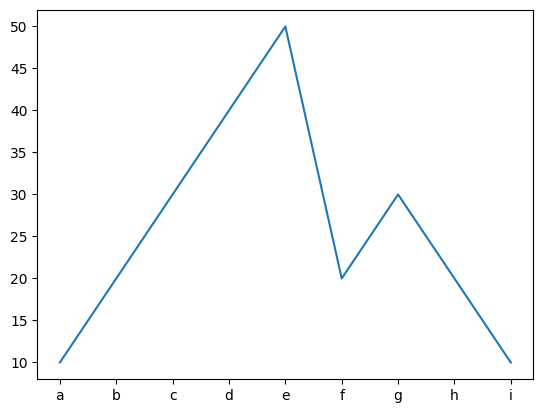

In [158]:
s = Series([10, 20, 30, 40, 50, 20, 30, 20, 10],
          index=list('abcdefghi'))

s.plot.line()   # this is the API for plotting in Pandas!

In [ ]:
s.plot.line(title='My amazing plot',
           color='green')   # this is the API for plotting in Pandas!